<a href="https://colab.research.google.com/github/AdammGreen/Social-Media-Analysis-Python-/blob/main/SocialMedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")


# Any results you write to the current directory are saved as output.

In [ ]:
#import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('test_file.csv')

In [ ]:
data.shape

(32597, 9)

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
data

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0.0,0.0,1.0
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121.0,2.0,13.0
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12.0,1.0,0.0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0.0,0.0,3.0
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32491,VXfWrHdZwY,World Bank Supports Kosovo's Digital Economy P...,"PRISHTINA, June 22, 2016? The World Bank and t...",World Bank Group,economy,2016-06-23 21:58:03,-1.0,0.0,0.0
32492,607lf48HF1,Factbox: What Brexit could mean for the UK eco...,By Andy Bruce and William Schomberg LONDON (Re...,Reuters via Yahoo! News,economy,2016-06-23 21:59:00,-1.0,0.0,0.0
32493,9ylFzbTHSZ,Hillary: I'll Fix Obama's Lousy Economy By App...,"Hillary Clinton promised &quot;big, bold&quot;...",Investor's Business Daily,obama,2016-06-23 22:00:11,251.0,11.0,3.0
32494,u5kskerw4O,Six NBA teams President Obama should consider ...,Obama also said he would “absolutely” want to ...,New York Daily News,obama,2016-06-23 22:00:12,11.0,0.0,0.0


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to clean and preprocess a single headline
def clean_and_preprocess(headline):
    # Convert to lowercase
    headline = headline.lower()

    # Remove URLs
    headline = re.sub(r'http\S+|www\S+|https\S+', '', headline, flags=re.MULTILINE)

    # Remove mentions
    headline = re.sub(r'@\w+', '', headline)

    # Remove special characters and numbers
    headline = re.sub(r'[^a-zA-Z\s]', '', headline)

    # Tokenize the headline
    words = word_tokenize(headline)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_headline = ' '.join(words)

    return cleaned_headline

# Apply the cleaning function to each headline in the 'text' column
data['cleaned_text'] = data['Headline'].apply(clean_and_preprocess)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(data[ 'cleaned_text'].head())


Cleaned Dataset:
0    budget passed national assembly ntrillion war ...
1    recent microsoft research video shows augmente...
2    microsoft teamed bing create taytweets account...
3    central bankers managed steer world economy cl...
4    however streak sevenday gains might end market...
Name: cleaned_text, dtype: object


In [ ]:
data.head(5)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,cleaned_text
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0.0,0.0,1.0,budget passed national assembly ntrillion war ...
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121.0,2.0,13.0,recent microsoft research video shows augmente...
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12.0,1.0,0.0,microsoft teamed bing create taytweets account...
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0.0,0.0,3.0,central bankers managed steer world economy cl...
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3.0,0.0,0.0,however streak sevenday gains might end market...


In [ ]:
#Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(headline):
    sentiment = analyzer.polarity_scores(headline)
    compound_score = sentiment['compound']
    return compound_score

# Apply the function to the 'tokens' column of the DataFrame
data['SentimentVADER'] = data['cleaned_text'].apply(get_sentiment)

# Print the DataFrame with sentiment scores
print(data['SentimentVADER'])

0       -0.5994
1        0.0000
2        0.3400
3       -0.6369
4        0.6705
          ...  
32491    0.0000
32492    0.4939
32493    0.3612
32494    0.1513
32495    0.1531
Name: SentimentVADER, Length: 32496, dtype: float64


In [ ]:
data.head(5)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,cleaned_text,SentimentVADER
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0.0,0.0,1.0,budget passed national assembly ntrillion war ...,-0.5994
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121.0,2.0,13.0,recent microsoft research video shows augmente...,0.0000
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12.0,1.0,0.0,microsoft teamed bing create taytweets account...,0.3400
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0.0,0.0,3.0,central bankers managed steer world economy cl...,-0.6369
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3.0,0.0,0.0,however streak sevenday gains might end market...,0.6705


In [ ]:
temp = data.groupby('Topic').count()['Headline'].reset_index().sort_values(by='Headline',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Topic,Headline
0,economy,11689
2,obama,10244
1,microsoft,7879
3,palestine,2684


<Axes: xlabel='Topic', ylabel='count'>

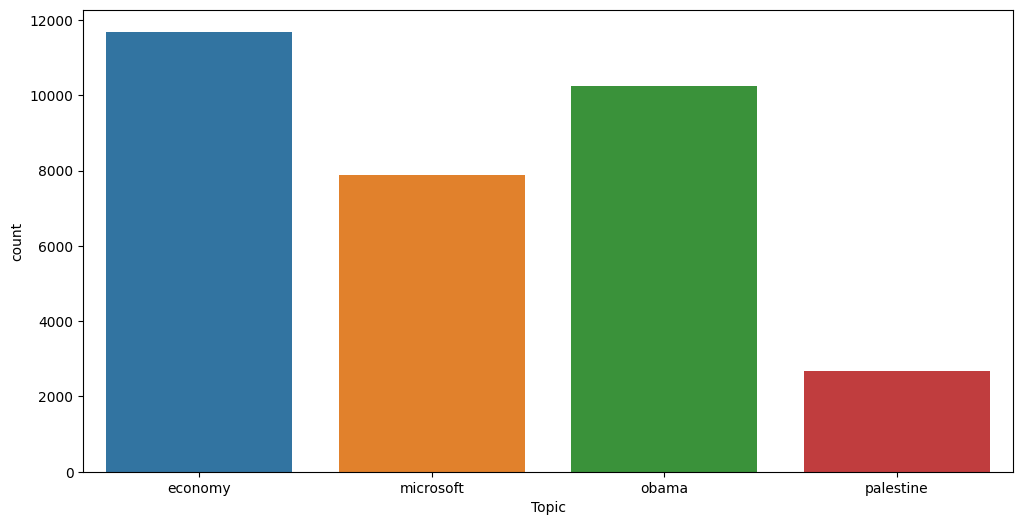

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=data)

In [ ]:
# Define a function to categorize sentiment based on VADER score
def categorize_sentiment(score):
    if score < 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'neutral'

# Apply the function to create the 'SentimentCategory' column
data['SentimentCategory'] = data['SentimentVADER'].apply(categorize_sentiment)

In [ ]:
data.head(5)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,cleaned_text,SentimentVADER,SentimentCategory
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0.0,0.0,1.0,budget passed national assembly ntrillion war ...,-0.5994,negative
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121.0,2.0,13.0,recent microsoft research video shows augmente...,0.0000,neutral
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12.0,1.0,0.0,microsoft teamed bing create taytweets account...,0.3400,positive
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0.0,0.0,3.0,central bankers managed steer world economy cl...,-0.6369,negative
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3.0,0.0,0.0,however streak sevenday gains might end market...,0.6705,positive


In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.Topic,
    values = temp.Headline,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
from plotly import graph_objs as go

In [ ]:
text = data.Headline



In [ ]:
temp1 = data.groupby('SentimentCategory').count()['Headline'].reset_index().sort_values(by='Headline',ascending=False)
temp1.style.background_gradient(cmap='Purples')

fig1 = go.Figure(go.Funnelarea(
    text = temp1.Headline,
    values = temp1.SentimentCategory,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig1.show()

In [ ]:
# Load NRC Emotion Lexicon
lexicon = pd.read_csv('test_file.csv', sep='\t', header=None, names=['word', 'emotion', 'association'], comment=';')

In [ ]:
# Function to perform emotion detection for a given headline
def detect_emotion(Headline):
    emotions = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}

    words = Headline.lower().split()

    for word in words:
        matches = lexicon[(lexicon['word'] == word) & (lexicon['association'] == 1)]

        for emotion in emotions.keys():
            emotions[emotion] += len(matches[matches['emotion'] == emotion])

    return emotions

# Apply emotion detection to each tweet in the dataset
data['emotions'] = data['cleaned_text'].apply(detect_emotion)

# Display the updated dataset with emotion counts
print("Updated Dataset with Emotion Counts:")
print(data['text', 'emotions'].head())

KeyboardInterrupt: ignored